# Import & configure library

In [1]:
import platform
import time
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn


In [2]:
print(f'{platform.python_version()=}')

print(f'{np.__version__=}')
print(f'{pd.__version__=}')
print(f'{matplotlib.__version__=}')
print(f'{sklearn.__version__=}')


platform.python_version()='3.8.3rc1'
np.__version__='1.17.4'
pd.__version__='1.0.3'
matplotlib.__version__='3.2.1'
sklearn.__version__='0.22.2.post1'


In [3]:
SEED = 42
np.random.seed(SEED)

START_TIME = time.time()


In [4]:
## Load preprocessed dataset

In [5]:
dataset = pd.read_pickle('./dataset.pk')


## TF IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, sublinear_tf=True, norm='l2', lowercase=False)
X = vectorizer.fit_transform(dataset['content'])


# K-means++

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=SEED, verbose=1, n_init=10, precompute_distances=True)
y_pred = kmeans.fit_predict(X)


Initialization complete
Iteration  0, inertia 78306.693
Iteration  1, inertia 40052.824
Iteration  2, inertia 39873.063
Iteration  3, inertia 39850.088
Iteration  4, inertia 39843.820
Iteration  5, inertia 39841.758
Iteration  6, inertia 39840.887
Iteration  7, inertia 39840.534
Iteration  8, inertia 39840.383
Iteration  9, inertia 39840.295
Iteration 10, inertia 39840.242
Iteration 11, inertia 39840.214
Iteration 12, inertia 39840.199
Iteration 13, inertia 39840.191
Iteration 14, inertia 39840.187
Iteration 15, inertia 39840.185
Iteration 16, inertia 39840.182
Iteration 17, inertia 39840.178
Iteration 18, inertia 39840.175
Iteration 19, inertia 39840.173
Iteration 20, inertia 39840.173
Iteration 21, inertia 39840.172
Iteration 22, inertia 39840.171
Iteration 23, inertia 39840.169
Iteration 24, inertia 39840.167
Iteration 25, inertia 39840.165
Iteration 26, inertia 39840.164
Iteration 27, inertia 39840.163
Iteration 28, inertia 39840.162
Iteration 29, inertia 39840.161
Iteration 30, in

# PCA for 3D visualization

In [8]:
from sklearn.decomposition import PCA, TruncatedSVD
pca = [
    TruncatedSVD(n_components=3, algorithm='arpack', random_state=SEED),
    TruncatedSVD(n_components=3, algorithm='randomized', n_iter=10, random_state=SEED)
]
pca_variance = []

for i in range(len(pca)):
    try:
        pca[i] = pca[i].fit(X)
    except:
        if X.dtype == np.int64:
            pca[i] = pca[i].fit(X.astype(np.float64).toarray())
        else:
            pca[i] = pca[i].fit(X.toarray())

    gc.collect()
    print(f'Variance for pca[{i}] : {pca[i].explained_variance_ratio_.sum()}')
    pca_variance.append(pca[i].explained_variance_ratio_.sum())

# select best PCA
index_best_pca = pca_variance.index(max(pca_variance))
X_reduced = pca[i].transform(X)


Variance for pca[0] : 0.02739833888561602
Variance for pca[1] : 0.02739833890099721


# Cluster 3D visualization
 Source : https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

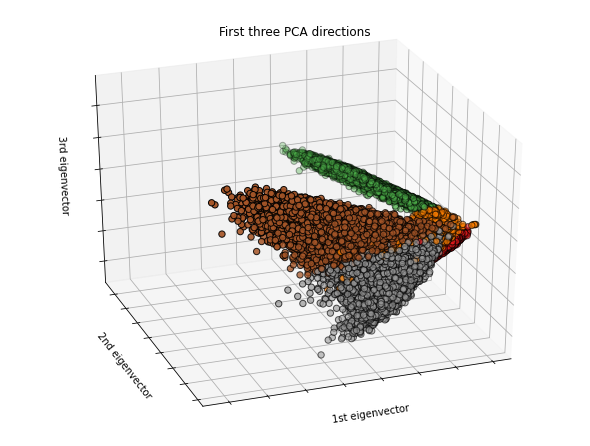

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_pred,
           cmap='Set1', edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()



# Supervised evaluation

In [10]:
from sklearn import metrics
y_true = dataset['topic'].to_list()


In [11]:
print(f'{metrics.adjusted_rand_score(y_true, y_pred)=}')
print(f'{metrics.homogeneity_score(y_true, y_pred)=}')
print(f'{metrics.completeness_score(y_true, y_pred)=}')
print(f'{metrics.v_measure_score(y_true, y_pred)=}')
print(f'{metrics.fowlkes_mallows_score(y_true, y_pred)=}')


metrics.adjusted_rand_score(y_true, y_pred)=0.9313637522720699
metrics.homogeneity_score(y_true, y_pred)=0.9170386227916734
metrics.completeness_score(y_true, y_pred)=0.9167906937890842
metrics.v_measure_score(y_true, y_pred)=0.9169146415306973
metrics.fowlkes_mallows_score(y_true, y_pred)=0.9474406310870145


# Unsupervised evaluation

In [12]:
print(f'{metrics.calinski_harabasz_score(X.toarray(), y_pred)=}')
gc.collect()
print(f'{metrics.silhouette_score(X, y_pred, sample_size=X.shape[0] // 5)=}')
print(f'{metrics.davies_bouldin_score(X.toarray(), y_pred)=}')
gc.collect()


metrics.calinski_harabasz_score(X.toarray(), y_pred)=349.04195674478404
metrics.silhouette_score(X, y_pred, sample_size=X.shape[0] // 5)=0.01835547854087986
metrics.davies_bouldin_score(X.toarray(), y_pred)=8.14052446235942


0

In [13]:
END_TIME = time.time()
TOTAL_SECONDS = END_TIME - START_TIME
print(f'{TOTAL_SECONDS=}')


TOTAL_SECONDS=1008.1611230373383
